In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
train,test = mnist.load_data() #Loading handwritten digits dataset with 28x28 images (labelled data)

In [3]:
X_train, Y_train = train #Splitting data into images and corresponding labels

In [4]:
X_test, Y_test = test

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
Y_train.shape

(60000,)

In [9]:
Y_test.shape

(10000,)

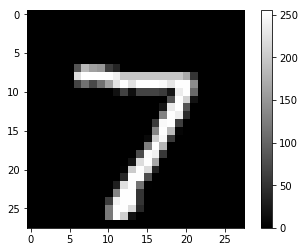

In [11]:
import matplotlib.pyplot as plt #Displaying the image using plotting library
plt.imshow(X_test[0],cmap='gray')
plt.colorbar()
plt.show()

In [12]:
#Normalizing data to bring in range 0 to 1 from 0 to 255
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train.shape

(60000, 28, 28)

In [14]:
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])

In [15]:
X_train.shape #Flattened the images from 28x28 to 784 to feed to neural network neurons

(60000, 784)

In [16]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [18]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
model = Sequential() #Making a feed-forward artificial neural network with sequential layers

In [21]:
#Adding layers and activations
model.add(Dense(128,activation='relu',input_shape=(784,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [22]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#Categorical crossentropy is used to define error for multiple classes (0 to 9 in this case)
#Adam optimizer uses a combination of RMSProp and Gradient Descent Optimization technique
#We are judging the model on its accuracy

In [23]:
#Training the model using the training data
model.fit(X_train,Y_train,batch_size=1000,epochs=40,validation_split=0.2)
#All the above parameters in fit function are hyperparameters, change them and experiment with them to see what different results can be found

Train on 48000 samples, validate on 12000 samples
Epoch 1/40
48000/48000 [==============================] - 26s 534us/step - loss: 2.0936 - acc: 0.2528 - val_loss: 1.7294 - val_acc: 0.3306
Epoch 2/40
48000/48000 [==============================] - 1s 22us/step - loss: 1.3607 - acc: 0.4923 - val_loss: 1.0187 - val_acc: 0.5997
Epoch 3/40
48000/48000 [==============================] - 1s 22us/step - loss: 0.7748 - acc: 0.7138 - val_loss: 0.5230 - val_acc: 0.8493
Epoch 4/40
48000/48000 [==============================] - 1s 25us/step - loss: 0.4020 - acc: 0.8834 - val_loss: 0.3103 - val_acc: 0.9221
Epoch 5/40
48000/48000 [==============================] - 1s 22us/step - loss: 0.2480 - acc: 0.9380 - val_loss: 0.2365 - val_acc: 0.9379
Epoch 6/40
48000/48000 [==============================] - 1s 22us/step - loss: 0.1834 - acc: 0.9548 - val_loss: 0.2034 - val_acc: 0.9476
Epoch 7/40
48000/48000 [==============================] - 1s 22us/step - loss: 0.1487 - acc: 0.9626 - val_loss: 0.1890 - val_a

In [24]:
#calculating test accuracy
import numpy as np
total = len(X_test)
Y_pred = model.predict(X_test)
corr=0
for i in range(len(X_test)):
    if np.argmax(Y_pred[i]) == np.argmax(Y_test[i]):
        corr+=1

In [25]:
test_accuracy = corr/total

In [26]:
test_accuracy

0.9646

In [29]:
#working of argmax
np.argmax(Y_pred[0])

7

In [30]:
np.argmax(Y_test[0])

7